# Introduction
Sharpe Ratio compares the expected returns for two investment opportunities and calculates the additional return per unit of risk an investor could obtain by choosing one over the other. In particular, it looks at the difference in returns for two investments and compares the average difference to the standard deviation (as a measure of risk) of this difference. 
A higher Sharpe ratio means that the reward will be higher for a given amount of risk.

In [56]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
jpm_data = pd.read_csv('/Users/ljy/Documents/GraceGit/SharpeRatio-repo/StockData/JPM.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()
baba_data = pd.read_csv('/Users/ljy/Documents/GraceGit/SharpeRatio-repo/StockData/BABA.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()
amt_data = pd.read_csv('/Users/ljy/Documents/GraceGit/SharpeRatio-repo/StockData/AMT.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()
benchmark_data = pd.read_csv('/Users/ljy/Documents/GraceGit/SharpeRatio-repo/StockData/GSPC.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()

# Exploratory Analysis

In [57]:
# Display summary for jpm_data
print('JPM\n')
jpm_data.info()
print(jpm_data.head())

# Display summary for baba_data
print('BABA\n')
baba_data.info()
print(baba_data.head())

# Display summary for amt_data
print('AMT\n')
amt_data.info()
print(amt_data.head())

# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
benchmark_data.head()

JPM

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-08-19 to 2020-08-17
Data columns (total 6 columns):
Open        252 non-null float64
High        252 non-null float64
Low         252 non-null float64
Close       252 non-null float64
AdjClose    252 non-null float64
Volume      252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
                  Open        High         Low       Close    AdjClose  \
Date                                                                     
2019-08-19  109.629997  109.750000  108.419998  108.690002  105.013260   
2019-08-20  107.849998  108.440002  107.239998  107.309998  103.679939   
2019-08-21  108.209999  108.430000  107.449997  107.610001  103.969780   
2019-08-22  108.370003  109.269997  107.930000  108.720001  105.042244   
2019-08-23  108.000000  108.779999  105.110001  106.019997  102.433571   

              Volume  
Date                  
2019-08-19   8265400  
2019-08-20   8374000  
2019-08-21   8

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2019-08-19,2913.479980,2931.000000,2913.479980,2923.649902,2923.649902,3212880000
2019-08-20,2919.010010,2923.629883,2899.600098,2900.510010,2900.510010,3066300000
2019-08-21,2922.040039,2928.729980,2917.909912,2924.429932,2924.429932,3011190000
2019-08-22,2930.939941,2939.080078,2904.510010,2922.949951,2922.949951,2890880000
2019-08-23,2911.070068,2927.010010,2834.969971,2847.110107,2847.110107,3937300000


In [58]:
jpm_adjclose = jpm_data["AdjClose"]
baba_adjclose = baba_data["AdjClose"]
amt_adjclose = amt_data["AdjClose"]
benchmark_adjclose = benchmark_data["AdjClose"]

In [59]:
data = {'jpm': jpm_adjclose, 'baba': baba_adjclose, 'amt': amt_adjclose}
df = pd.DataFrame (data, columns = ['jpm','baba','amt'])
print (df)

                   jpm        baba         amt
Date                                          
2019-08-19  105.013260  178.279999  221.374176
2019-08-20  103.679939  177.210007  221.737915
2019-08-21  103.969780  175.240005  223.527084
2019-08-22  105.042244  171.910004  224.637924
2019-08-23  102.433571  164.539993  222.730804
...                ...         ...         ...
2020-08-11  103.820000  248.419998  246.199997
2020-08-12  102.940002  255.190002  251.300003
2020-08-13  102.370003  253.720001  250.729996
2020-08-14  102.410004  253.970001  250.119995
2020-08-17   99.709999  256.959991  250.910004

[252 rows x 3 columns]


,jpm,baba,amt
count,252.000000,252.000000,252.000000
mean,110.365226,204.684127,233.343262
std,16.909878,25.012811,19.039906
min,77.462379,161.929993,177.601761
25%,96.245928,182.727501,219.909031
50%,109.083004,204.845002,230.844559
75%,127.027323,218.707501,250.730194
max,137.409225,265.679993,271.290009


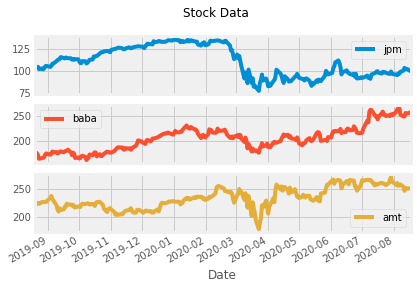

In [60]:
# visualize the stock_data
df.plot(title='Stock Data', subplots=True);

# summarize the stock_data
df.describe()

count     252.000000
mean     3045.652613
std       223.988872
min      2237.399902
25%      2930.092468
50%      3077.525024
75%      3221.812500
max      3386.149902
Name: AdjClose, dtype: float64

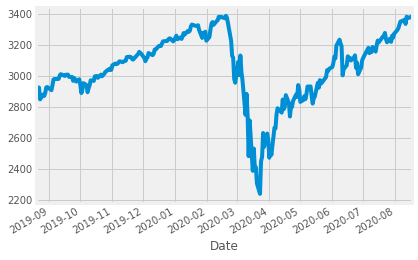

In [61]:
# plot the benchmark_data
benchmark_adjclose.plot();

# summarize the benchmark_data
benchmark_adjclose.describe()

# Calculate daily stock returns

,jpm,baba,amt
count,251.000000,251.000000,251.000000
mean,0.000312,0.001704,0.000878
std,0.032237,0.022267,0.027566
min,-0.149649,-0.078093,-0.151638
25%,-0.011627,-0.011790,-0.011667
50%,0.000934,0.002534,0.000481
75%,0.012160,0.013614,0.010592
max,0.180125,0.089510,0.122220


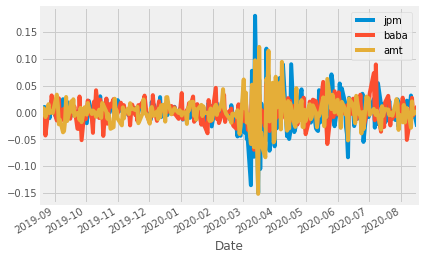

In [62]:
# calculate daily stock_data returns
stock_returns = df.pct_change()

# plot the daily returns
stock_returns.plot();

# summarize the daily returns
stock_returns.describe()

count    251.000000
mean       0.000803
std        0.021031
min       -0.119841
25%       -0.003965
50%        0.001844
75%        0.007761
max        0.093828
Name: AdjClose, dtype: float64

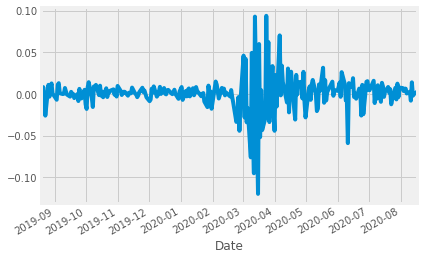

In [63]:
# calculate daily benchmark_data returns
sp_returns = benchmark_adjclose.pct_change()

# plot the daily returns
sp_returns.plot();

# summarize the daily returns
sp_returns.describe()

# Calculate Excess Returns

,jpm,baba,amt
count,251.000000,251.000000,251.000000
mean,-0.000491,0.000902,0.000075
std,0.017752,0.018767,0.018193
min,-0.059485,-0.061083,-0.054178
25%,-0.007604,-0.010983,-0.011320
50%,-0.000464,0.000294,0.000541
75%,0.006413,0.012173,0.009456
max,0.087254,0.081682,0.062265


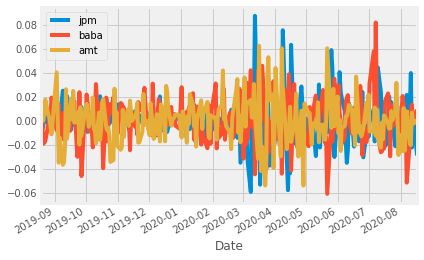

In [64]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot();

# summarize the excess_returns
excess_returns.describe()

# Calculate the mean of excess_returns

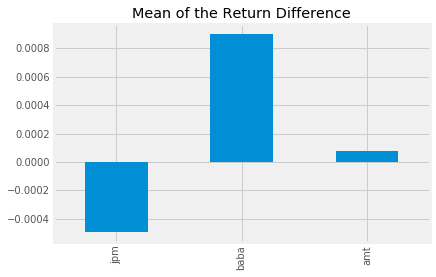

In [68]:
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference');

# Calculate the standard deviations

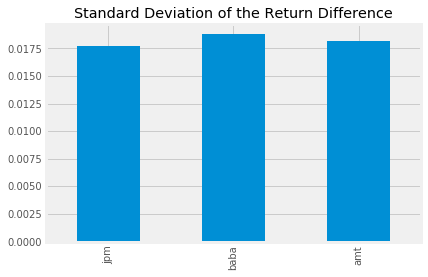

In [69]:
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference');

# Caculate the daily sharpe ratio 

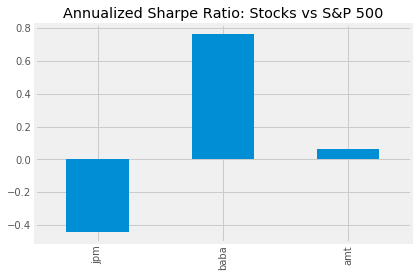

In [67]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio 
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500');

#  Conclusion
<p>From the graph we can see that Alibaba has the highest Sharpe Ratio in comparison with American Tower Corporation and JP Morgan. Since the data collected stock prices from August 2019 to August 2020, the Sharpe Ratio indicates the difference among industries impacted by COVID-19.</p>
<p>This difference was mostly driven by differences in return rather than risk among BABA, JPM and AMT. The risk of choosing BABA over AMT and JPM (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for BABA ends up higher mainly due to the higher average daily returns for BABA. </p>